# 서울시 생필품 농수축산물
데이터 링크 : http://data.seoul.go.kr/dataList/OA-1170/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [8]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [11]:
import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
csv_list = glob.glob('./생필품 농수축산물/*.csv')

df = pd.DataFrame()
for path in csv_list:
  data = pd.read_csv(path,encoding='cp949')
  df = df.append(data)

df.reset_index(drop=True,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame

In [14]:
df.isnull().sum()

일련번호                     0
시장/마트 번호                 0
시장/마트 이름                 0
품목 번호                    0
품목 이름                   13
실판매규격                    0
가격(원)                    0
년도-월                     0
비고                   87077
시장유형 구분(시장/마트) 코드        0
시장유형 구분(시장/마트) 이름        0
자치구 코드                   0
자치구 이름                   0
점검일자                     0
dtype: int64

In [15]:
# 2020, 2013 ~ 2017 파일에서 품목 이름 결측치 확인
df.loc[df['품목 이름'].isnull() == True]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
26485,1669952,214,이마트 목동점,171,NaN,10개,2980,2020-12,"국내산,특란",2,대형마트,470000,양천구,2020-12-21
26503,1669950,214,이마트 목동점,285,NaN,100g,2080,2020-12,"국내산,생삼겹",2,대형마트,470000,양천구,2020-12-21
31073,1670030,223,홈플러스 목동점,278,NaN,600g,35982,2020-11,"국내산(음성,)농협",2,대형마트,470000,양천구,2020-11-30
31077,1670032,223,홈플러스 목동점,18,NaN,1kg,6495,2020-11,"국내산,하림",2,대형마트,470000,양천구,2020-11-30
60818,1672817,103,신영시장,171,NaN,10개,3900,2020-09,"국내산, 생영양란",1,전통시장,470000,양천구,2020-09-28
61268,1672832,102,목3동시장,285,NaN,600g,15600,2020-09,"국내산, 한돈",1,전통시장,470000,양천구,2020-09-28
61366,1672834,102,목3동시장,171,NaN,10개,2900,2020-09,"국내산, 정심(특란)",1,전통시장,470000,양천구,2020-09-28
63072,1672815,103,신영시장,285,NaN,600g,12000,2020-09,"국내산, 한돈",1,전통시장,470000,양천구,2020-09-28
63457,1672781,223,홈플러스 목동점,285,NaN,600g,13140,2020-09,"국내산, 일품포크",2,대형마트,470000,양천구,2020-09-28
63463,1672783,223,홈플러스 목동점,171,NaN,10개,2990,2020-09,"국내산, 신선란(특란)",2,대형마트,470000,양천구,2020-09-28


## 결측치 처리
- 품목 번호가 171, 285, 278, 18 만 결측치가 존재
- 계란 혹은 고기 종류의 품목에서 이름이 누락됨
- 품목번호와 실판매규격, 비고 등을 참고하여 결측치 대체


### 품목번호 285

In [16]:
# 285만 필터링한 경우 품목 이름이 쇠고기인 케이스 존재
df[df['품목 번호'] == 285]['품목 이름'].value_counts()

돼지고기    1555
쇠고기        1
Name: 품목 이름, dtype: int64

In [17]:
# 국내산 일품포크가 쇠고기로 되어있는 것을 확인
df[(df['품목 번호'] == 285) & (df['품목 이름'] == '쇠고기')]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
31075,1670031,223,홈플러스 목동점,285,쇠고기,600g,11340,2020-11,"국내산,일품포크",2,대형마트,470000,양천구,2020-11-30


In [18]:
# 비고란의 국내산, 일품포크 카테고리만 확인
# 모두 돼지고기로 나타난것으로 보아 잘못 기재된 것으로 판단
df[(df['품목 번호'] == 285) & (df['비고'] == '국내산, 일품포크')]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
30763,1606780,223,홈플러스 목동점,285,돼지고기,600g,9300,2020-11,"국내산, 일품포크",2,대형마트,470000,양천구,2020-11-30
30765,1606779,223,홈플러스 목동점,285,돼지고기,100g,1550,2020-11,"국내산, 일품포크",2,대형마트,470000,양천구,2020-11-30
30879,1610081,223,홈플러스 목동점,285,돼지고기,100g,1990,2020-11,"국내산, 일품포크",2,대형마트,470000,양천구,2020-11-30
30881,1610082,223,홈플러스 목동점,285,돼지고기,600g,11940,2020-11,"국내산, 일품포크",2,대형마트,470000,양천구,2020-11-30
46280,1595093,223,홈플러스 목동점,285,돼지고기,100g,2290,2020-10,"국내산, 일품포크",2,대형마트,470000,양천구,2020-10-29
46296,1595092,223,홈플러스 목동점,285,돼지고기,600g,13740,2020-10,"국내산, 일품포크",2,대형마트,470000,양천구,2020-10-29
46338,1600134,223,홈플러스 목동점,285,돼지고기,100g,2290,2020-10,"국내산, 일품포크",2,대형마트,470000,양천구,2020-10-29
46340,1600133,223,홈플러스 목동점,285,돼지고기,600g,13740,2020-10,"국내산, 일품포크",2,대형마트,470000,양천구,2020-10-29
46410,1598430,223,홈플러스 목동점,285,돼지고기,600g,11340,2020-10,"국내산, 일품포크",2,대형마트,470000,양천구,2020-10-29
46412,1598431,223,홈플러스 목동점,285,돼지고기,100g,1890,2020-10,"국내산, 일품포크",2,대형마트,470000,양천구,2020-10-29


In [ ]:
# 결측치와 쇠고기를 돼지고기로 수정
df.loc[(df['품목 번호'] == 285) & df['품목 이름'].isnull(),'품목 이름'] = '돼지고기'
df.loc[(df['품목 번호'] == 285) & (df['품목 이름'] == '쇠고기'),'품목 이름'] = '돼지고기'

### 품목번호 171

In [ ]:
# 285만 필터링한 경우 품목 이름이 돼지고기 존재
df[df['품목 번호'] == 171]['품목 이름'].value_counts()

달걀(10개)    15352
달걀(특란)      1913
달걀(30개)        1
돼지고기           1
Name: 품목 이름, dtype: int64

In [ ]:
# 비고란과 실판매규격을 보아 달걀이 잘못 기재되었다고 판단
df[(df['품목 번호'] == 171) & (df['품목 이름'] == '돼지고기')]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
31079,1670033,223,홈플러스 목동점,171,돼지고기,10개,2990,2020-11,"국내,특란",2,대형마트,470000,양천구,2020-11-30


In [ ]:
# 돼지고기를 달걀(10개)로 수정
df.loc[(df['품목 번호'] == 171) & (df['품목 이름'] == '돼지고기'),'품목 이름'] = '달걀'
df.loc[(df['품목 번호'] == 171) & df['품목 이름'].isnull(),'품목 이름'] = '달걀'

In [ ]:
df.loc[df['품목 이름'].isnull()==True]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
31073,1670030,223,홈플러스 목동점,278,NaN,600g,35982,2020-11,"국내산(음성,)농협",2,대형마트,470000,양천구,2020-11-30
31077,1670032,223,홈플러스 목동점,18,NaN,1kg,6495,2020-11,"국내산,하림",2,대형마트,470000,양천구,2020-11-30


### 품목 이름 278, 18

In [ ]:
# 278로만 필터링한 결과 모두 쇠고기로 나타남
df[df['품목 번호'] == 278]['품목 이름'].value_counts()

쇠고기    1180
Name: 품목 이름, dtype: int64

In [ ]:
# 결측값의 다른 컬럼들을 보아도 쇠고기로 추정되기에 쇠고기로 수정
df[(df['품목 번호'] == 278) & (df['품목 이름'].isnull())]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
31073,1670030,223,홈플러스 목동점,278,NaN,600g,35982,2020-11,"국내산(음성,)농협",2,대형마트,470000,양천구,2020-11-30


In [ ]:
df.loc[(df['품목 번호'] == 278) & df['품목 이름'].isnull(),'품목 이름'] = '쇠고기'

In [ ]:
# 18로만 필터링한 결과 대부분이 닭고기지만 돼지고기,달걀인 케이스 발견
df[df['품목 번호'] == 18]['품목 이름'].value_counts()

닭고기       5356
돼지고기         5
달걀(왕란)       1
Name: 품목 이름, dtype: int64

In [ ]:
# 품목 번호가 18이지만 달걀인 케이스 확인
df[(df['품목 번호'] == 18) & (df['품목 이름'] == '달걀(왕란)')]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
348024,403499,221,숭인시장,18,달걀(왕란),1마리,0,2013-01,NaN,1,전통시장,305000,강북구,2013-01-31


In [ ]:
# 품목 번호가 18이지만 돼지고기인 케이스 확인
df[(df['품목 번호'] == 18) & (df['품목 이름'] == '돼지고기')]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
26501,1669951,214,이마트 목동점,18,돼지고기,1kg,4980,2020-12,"국내산,하림",2,대형마트,470000,양천구,2020-12-21
61368,1672833,102,목3동시장,18,돼지고기,1마리(1.2kg),6500,2020-09,"국내산, 하림",1,전통시장,470000,양천구,2020-09-28
63104,1672816,103,신영시장,18,돼지고기,1마리(1kg),6000,2020-09,"국내산, 하림",1,전통시장,470000,양천구,2020-09-28
63459,1672782,223,홈플러스 목동점,18,돼지고기,1마리(1kg),4995,2020-09,"국내산, 하림",2,대형마트,470000,양천구,2020-09-28
65390,1672799,214,이마트 목동점,18,돼지고기,1마리(1kg),4980,2020-09,"국내산, 마니커",2,대형마트,470000,양천구,2020-09-28


In [ ]:
# 실판매 규격이 1마리(1kg)인 경우 모두 닭고기
df[(df['품목 번호'] == 18) & (df['실판매규격'] == '1마리(1kg)')]
# df[(df['품목 번호'] == 18) & (df['실판매규격'] == '1마리(1kg)')]['품목 이름'].value_counts()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
1249,1345316,40,홈플러스등촌점,18,닭고기,1마리(1kg),4895,2018-12,하림(2마리9790원)행사,2,대형마트,500000,강서구,2018-12-31
1266,1345333,42,이마트가양점,18,닭고기,1마리(1kg),6180,2018-12,하림,2,대형마트,500000,강서구,2018-12-31
4376,1315896,40,홈플러스등촌점,18,닭고기,1마리(1kg),4995,2018-10,하림(2마리9990원),2,대형마트,500000,강서구,2018-10-29
4393,1315913,42,이마트가양점,18,닭고기,1마리(1kg),5980,2018-10,마니커(행사),2,대형마트,500000,강서구,2018-10-29
9578,1275606,42,이마트가양점,18,닭고기,1마리(1kg),4990,2018-07,하림(행사),2,대형마트,500000,강서구,2018-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344168,424438,134,신원시장(신림1동),18,닭고기,1마리(1kg),7000,2013-03,하림,1,전통시장,620000,관악구,2013-03-28
344840,425110,66,수유재래시장,18,닭고기,1마리(1kg),5000,2013-03,NaN,1,전통시장,305000,강북구,2013-03-28
345544,412107,51,2001아울렛불광점,18,닭고기,1마리(1kg),8990,2013-02,초원의전설,2,대형마트,380000,은평구,2013-02-28
346488,413419,134,신원시장(신림1동),18,닭고기,1마리(1kg),7000,2013-02,하림,1,전통시장,620000,관악구,2013-02-28


In [ ]:
# 실판매규격과 가격 그리고 비고에 마니커,하림이 기재되어 있는 것으로 보아 닭고기가 맞다고 판단 후 수정
df.loc[(df['품목 번호'] == 18) & (df['품목 이름'] == '돼지고기'),'품목 이름'] = '닭고기'
df.loc[(df['품목 번호'] == 18) & (df['품목 이름'] == '달걀(왕란)'),'품목 이름'] = '닭고기'
df.loc[(df['품목 번호'] == 18) & (df['품목 이름'].isnull()),'품목 이름'] = '닭고기'

In [ ]:
df[df['품목 번호'] == 18]['품목 이름'].value_counts()

닭고기    5363
Name: 품목 이름, dtype: int64

### 품목 번호 & 품목 이름 전처리

In [ ]:
# 전처리 결과 몇몇의 오염된 데이터가 있는 것을 확인하였고 이를 최대한 수정
print(len(df['품목 번호'].unique()))
print(len(df['품목 이름'].unique()))

100
93


In [ ]:
# 하나의 품목 번호에 여러개의 품목이름이 있는 경우 가장 높은 빈도의 이름으로 수정
def check_dup_product(df):
  dataframe = df.copy()
  for num in dataframe['품목 번호'].unique():
    name_count = dataframe[dataframe['품목 번호'] == num]['품목 이름'].value_counts()
    if len(name_count) > 1:
      for i in range(1,len(name_count)):
        print(name_count.index[i],name_count[i])
        if name_count[i] / name_count.sum() < 0.85:
          dataframe.loc[(df['품목 번호'] == num) & (dataframe['품목 이름'] == name_count.index[i]),'품목 이름'] = name_count.index[0]

  return dataframe

df2 = check_dup_product(df)

상추(100g) 1
오이(다다기) 1
쇠고기(한우,불고기) 1
달걀(특란) 1913
달걀 7
달걀(30개) 1
닭고기 6
조기(냉동,수입산) 1
명태(일본산,냉동) 1
오징어(생물,국산) 1
조기 1
고등어(생물,국산) 1
오징어(생물,국산) 1
닭고기 1
호박 1
양파(1.5kg망) 1
돼지고기(생삼겹살) 1
닭고기(육계) 1
달걀(10개) 1
조기(냉동,국산) 1
명태(러시아,냉동) 1
고등어(냉동,국산) 1
명태(러시아,냉동) 1
조기 6
동태 6
무(1kg) 1
달걀(10개) 6
달걀(특란) 1
달걀(30개) 6
오징어(냉동,국산) 1


In [ ]:
# 품목 이름이 같지만 여러 번호에 분포되어 있는 케이스
from collections import defaultdict

def multi_number(df):
  dataframe = df.copy()
  product_number_dict = defaultdict(list)
  multi_number_dict = defaultdict(list)

  for num in dataframe['품목 번호'].unique():
    product_name = dataframe[dataframe['품목 번호'] == num]['품목 이름'].value_counts().index[0]

    if product_name not in product_number_dict.keys():
      product_number_dict[product_name].append(num)
    else:
      product_number_dict[product_name].append(num)
    
  for i in product_number_dict:
    if len(product_number_dict[i]) > 1:
      print(i,product_number_dict[i])
      multi_number_dict[i].append(product_number_dict[i])

  return multi_number_dict

multi_number_dict = multi_number(df2)

무(세척무) [282, 133]
돼지고기(생삼겹살) [202, 99]
달걀(왕란) [181, 134]
사과(부사),중급(대) [237, 244]
배(신고),중급(대) [170, 248]
배추(중간) [175, 271]
고등어 [304, 13]
쇠고기(한우2등급) [106, 98]


In [ ]:
# 하나의 품목 번호로 합치기
def merge_number(df,multinumber_dict):
  dataframe = df.copy()
  for key,value in zip(multi_number_dict,multi_number_dict.values()):
    add_number = 0
    print(key,value)
    for i in range(1,len(value[0])):
      dataframe.loc[(dataframe['품목 번호'] == value[0][i]) ,'품목 번호'] = value[0][0]
      print(value[0][i], ' ==>', value[0][0])
  return dataframe

df3 = merge_number(df2,multi_number_dict)

무(세척무) [[282, 133]]
133  ==> 282
돼지고기(생삼겹살) [[202, 99]]
99  ==> 202
달걀(왕란) [[181, 134]]
134  ==> 181
사과(부사),중급(대) [[237, 244]]
244  ==> 237
배(신고),중급(대) [[170, 248]]
248  ==> 170
배추(중간) [[175, 271]]
271  ==> 175
고등어 [[304, 13]]
13  ==> 304
쇠고기(한우2등급) [[106, 98]]
98  ==> 106


In [ ]:
print(len(df3['품목 번호'].unique()))
print(len(df3['품목 이름'].unique()))

92
92


In [ ]:
# 사과 : 부사 or 사과
# 배 : '배(' 로 합치기
# 배추 : 배추로 합치기
# 무 : 세척무 or 무
# 양파 : 양파로 합치기(작은망도 1.5kg)
# 상추 : 상추로 합치기
# 오이 : 오이로 합치기
# 호박 : 인큐베이터 or 애호박 or 일반
# 쇠고기 : 불고기 or 일반고기
# 돼지고기 : 돼지고기, 삼겹살
# 닭고기 : 닭고기
# 달걀 : 달걀
# 조기 : (생물,국산),(냉동,국산),(생물,수입),(냉동,수입)
# 명태 : (생물,국산),(냉동,국산),(생물,수입),(냉동,수입)
# 오징어 : (생물,국산),(냉동,국산),(생물,수입),(냉동,수입)
# 고등어 : (생물,국산),(냉동,국산),(생물,수입),(냉동,수입)
# 갈치 : (생물,국산),(냉동,국산),(생물,수입),(냉동,수입)
df3['품목 이름'].unique()

array(['사과(부사, 300g)', '배(신고, 600g)', '배추(2.5~3kg)', '무(세척무)',
       '양파(1.5kg망)', '상추(100g)', '오이', '호박', '쇠고기(육우,불고기)', '돼지고기(삼겹살)',
       '닭고기', '달걀(10개)', '달걀(30개)', '조기(냉동,국산)', '명태(러시아,냉동)',
       '오징어(냉동,국산)', '고등어(생물,국산)', '사과', '무', '상추', '오이(다다기)',
       '호박(인큐베이터)', '쇠고기(한우1등급)', '돼지고기(생삼겹살)', '조기(국산,냉동)', '명태(냉동,수입산)',
       '오징어(냉동,수입산)', '조기(국산,생물)', '무(1kg)', '애호박', '쇠고기(한우,불고기)',
       '닭고기(육계)', '달걀(왕란)', '조기(냉동,수입산)', '오징어(생물,국산)', '삼겹살', '닭고기(토종닭)',
       '배추(국산)', '조기(생물,국산)', '사과(부사),중급(대)', '배(신고),중급(대)', '배추(중간)',
       '명태(생물,수입산)', '쇠고기', '무(세척무, 중)', '배(중품)', '호박(인큐베이터),중간', '오징어',
       '고등어', '고등어(30cm,수입산)', '배(중품),신고', '양파', '명태', '고등어(냉동,수입산)',
       '양파(작은망)', '배(신고),중급(중)', '고등어(냉동,국산)', '냉동참조기(20cm,국산)',
       '닭고기(중간)', '배', '배추', '사과(부사),중급(중)', '쇠고기(한우2등급)', '배(신고)',
       '사과(부사)', '조기', '명태(45cm,수입산)', '돼지고기', '동태', '고등어(생물,수입산)',
       '고등어(30cm,국산)', '오징어(냉동)', '사과(중품)', '달걀(15개)', '조기(생물,수입산)',
       '사과(중품), 부사', '조기(중국산,생물)', '오

In [ ]:
# 사과
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '사과' if '사과' in x  else x)

# 배
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '배' if '배(' in x else x)

# 배추
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '배추' if '배추' in x else x)

# 무
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '세척무' if '세척무' in x else '무' if '무' in x  else x)

# 양파
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '양파' if '양파' in x else x)

# 상추
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '상추' if '상추' in x else x)

# 오이
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '오이' if '오이' in x else x)

# 호박
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '애호박' if '애호박' in x  else '호박' if '호박' in x else x)

# 쇠고기
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '쇠고기' if '쇠고기' in x else x)

# 돼지고기
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '돼지고기' if ('돼지고기' in x) | ('삼겹살' in x)  else x)

# 닭고기
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '닭고기' if '닭고기' in x else x)

# 달걀
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '달걀' if '달걀' in x else x)

# 조기
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '조기(수입)' if x.startswith('조기')  & ('수입' in x) or ('중국산' in x) else '조기(국산)' if x.startswith('조기') & ('국산' in x) else x)

# 명태
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '명태(국산)' if x.startswith('명태') & ('국산' in x) else '명태(수입)' if x.startswith('명태') & ('수입' in x) or ('러시아' in x) or ('일본산' in x) else x)

# 오징어
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '오징어' if x.startswith('오징어') & x.endswith('냉동)') | x.endswith('오징어') else x)

# 고등어
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '고등어(국산)' if x.startswith('고등어') & ('국산' in x) else '고등어(수입)' if x.startswith('고등어') & ('수입' in x) else x)

# 갈치
df3['품목 이름'] = df3['품목 이름'].map(lambda x: '갈치(국산)' if x.startswith('갈치') & ('국산' in x) else '갈치(수입)' if x.startswith('갈치') & ('수입' in x) else x)

In [ ]:
df3['품목 이름'].unique()

array(['사과', '배', '배추', '세척무', '양파', '상추', '오이', '호박', '쇠고기', '돼지고기',
       '닭고기', '달걀', '조기(국산)', '명태(수입)', '오징어(냉동,국산)', '고등어(국산)', '무',
       '오징어(냉동,수입산)', '애호박', '조기(수입)', '오징어(생물,국산)', '오징어', '고등어',
       '고등어(수입)', '명태', '냉동참조기(20cm,국산)', '조기', '동태', '오징어(생물,수입산)',
       '명태(국산)', '갈치(국산)', '냉동참조기(20cm,수입)', '갈치(수입)'], dtype=object)

In [ ]:
print(len(df3['품목 번호'].unique()))
print(len(df3['품목 이름'].unique()))

92
33


In [ ]:
multi_number_dict = multi_number(df3)
data = merge_number(df3,multi_number_dict)

사과 [305, 28, 237, 270, 50, 279, 280]
배 [306, 170, 284, 281, 51, 27, 276]
배추 [307, 125, 175, 26]
세척무 [282, 274]
양파 [309, 24, 272]
상추 [310, 23]
오이 [22, 311, 273]
호박 [277, 119, 118]
쇠고기 [82, 131, 58, 278, 106, 129, 201]
돼지고기 [52, 202, 299, 285]
닭고기 [18, 283, 138, 275]
달걀 [171, 320, 181, 321, 17, 323, 176]
조기(국산) [259, 144, 136, 258]
명태(수입) [152, 264, 265, 315, 184]
고등어(국산) [266, 268, 316]
무 [25, 308]
조기(수입) [260, 261, 135, 292]
오징어 [253, 54]
고등어(수입) [318, 269, 267]
명태(국산) [263, 262]
갈치(국산) [250, 249]
사과 [[305, 28, 237, 270, 50, 279, 280]]
28  ==> 305
237  ==> 305
270  ==> 305
50  ==> 305
279  ==> 305
280  ==> 305
배 [[306, 170, 284, 281, 51, 27, 276]]
170  ==> 306
284  ==> 306
281  ==> 306
51  ==> 306
27  ==> 306
276  ==> 306
배추 [[307, 125, 175, 26]]
125  ==> 307
175  ==> 307
26  ==> 307
세척무 [[282, 274]]
274  ==> 282
양파 [[309, 24, 272]]
24  ==> 309
272  ==> 309
상추 [[310, 23]]
23  ==> 310
오이 [[22, 311, 273]]
311  ==> 22
273  ==> 22
호박 [[277, 119, 118]]
119  ==> 277
118  ==> 277
쇠고기 [[82, 13

In [ ]:
print(len(data['품목 번호'].unique()))
print(len(data['품목 이름'].unique()))

33
33


In [ ]:
import datetime
def add_date(df):
  df['년'] = df['년도-월'].map(lambda x: x[:4])
  df['월'] = df['년도-월'].map(lambda x: x[5:])
  df['년도-월'] = df['년도-월'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m'))
  return df

In [ ]:
data = add_date(data)

In [ ]:
data

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자,년,월
0,1342760,73,뚝도시장,305,사과,1개,1600,2018-12-01,NaN,1,전통시장,200000,성동구,2018-12-27,2018,12
1,1342761,73,뚝도시장,306,배,1개,3800,2018-12-01,NaN,1,전통시장,200000,성동구,2018-12-27,2018,12
2,1342762,73,뚝도시장,307,배추,1포기,2500,2018-12-01,NaN,1,전통시장,200000,성동구,2018-12-27,2018,12
3,1342763,73,뚝도시장,282,세척무,1개,1000,2018-12-01,NaN,1,전통시장,200000,성동구,2018-12-27,2018,12
4,1342764,73,뚝도시장,309,양파,1망,1800,2018-12-01,NaN,1,전통시장,200000,성동구,2018-12-27,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348409,406492,146,방이시장,171,달걀,10개,2150,2013-01-01,신선특란,1,전통시장,710000,송파구,2013-01-31,2013,01
348410,406493,146,방이시장,259,조기(국산),1마리(20cm),1780,2013-01-01,2마리 3560원,1,전통시장,710000,송파구,2013-01-31,2013,01
348411,406494,146,방이시장,152,명태(수입),1마리(45cm),5000,2013-01-01,행사,1,전통시장,710000,송파구,2013-01-31,2013,01
348412,406495,146,방이시장,256,"오징어(냉동,국산)",1마리(25cm),3000,2013-01-01,해동,1,전통시장,710000,송파구,2013-01-31,2013,01


## EDA


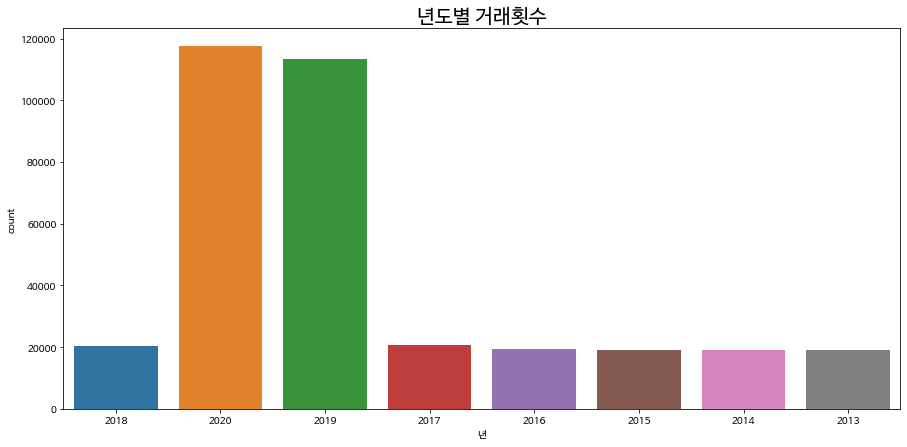

In [ ]:
# 년도별 거래 횟수
plt.figure(figsize=(15,7))
sns.countplot(data['년'])
plt.title('년도별 거래횟수',size=20)
plt.show()

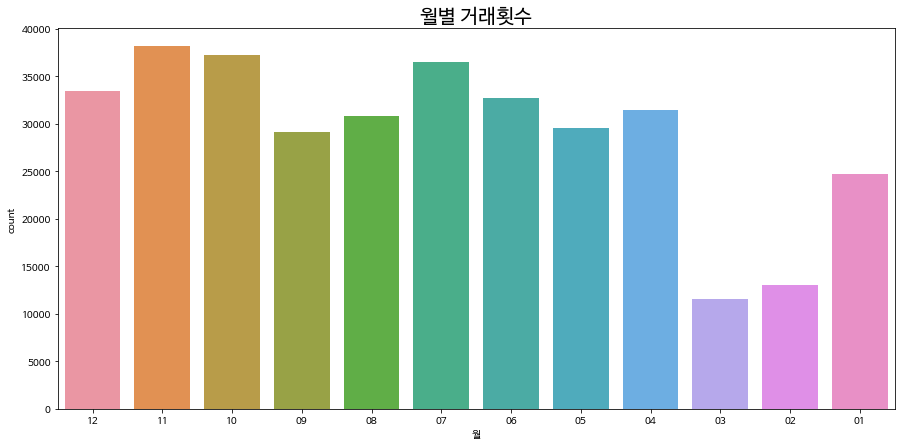

In [ ]:
# 월별 거래 횟수
plt.figure(figsize=(15,7))
sns.countplot(data['월'])
plt.title('월별 거래횟수',size=20)
plt.show()

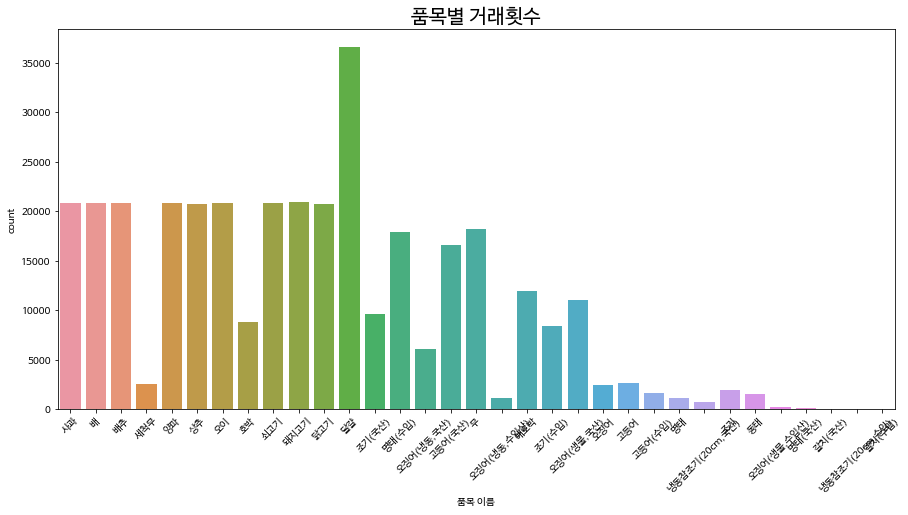

In [ ]:
# 품목별 거래횟수
plt.figure(figsize=(15,7))
sns.countplot(data['품목 이름'])
plt.title('품목별 거래횟수',size=20)
plt.xticks(rotation=45)
plt.show()

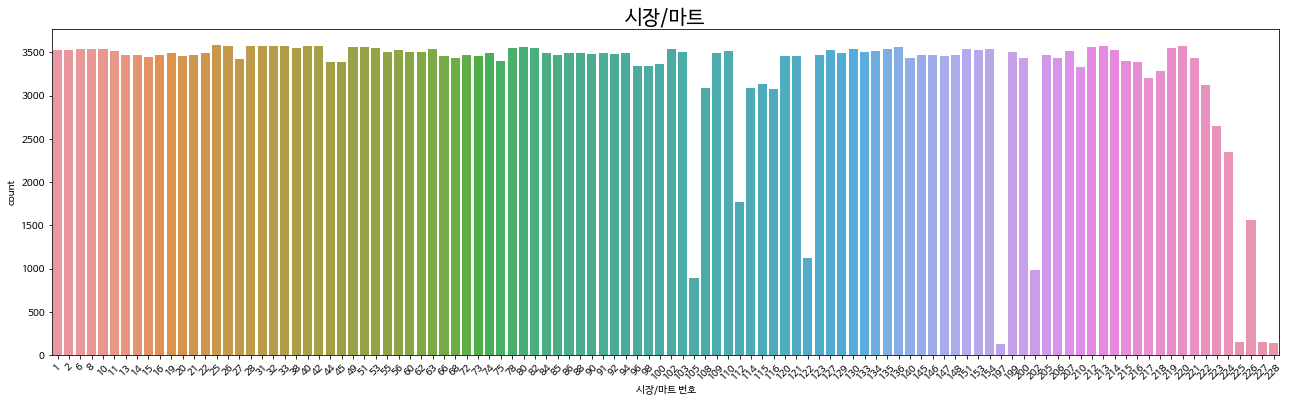

In [ ]:
# 장소별 거래횟수
plt.figure(figsize=(22,6))
sns.countplot(data['시장/마트 번호'])
plt.title('시장/마트',size=20)
plt.xticks(rotation=45)
plt.show()

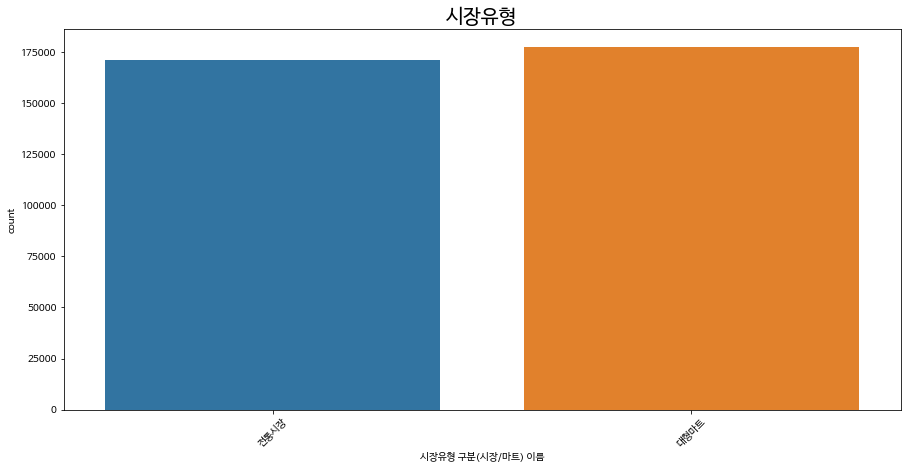

In [ ]:
# 장소 유형별 거래횟수
plt.figure(figsize=(15,7))
sns.countplot(data['시장유형 구분(시장/마트) 이름'])
plt.title('시장유형',size=20)
plt.xticks(rotation=45)
plt.show()

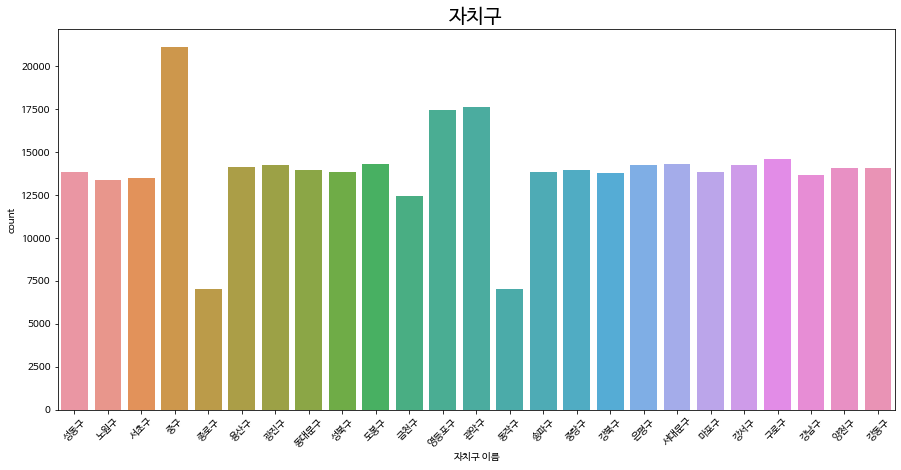

In [ ]:
# 자치구별
plt.figure(figsize=(15,7))
sns.countplot(data['자치구 이름'])
plt.title('자치구',size=20)
plt.xticks(rotation=45)
plt.show()

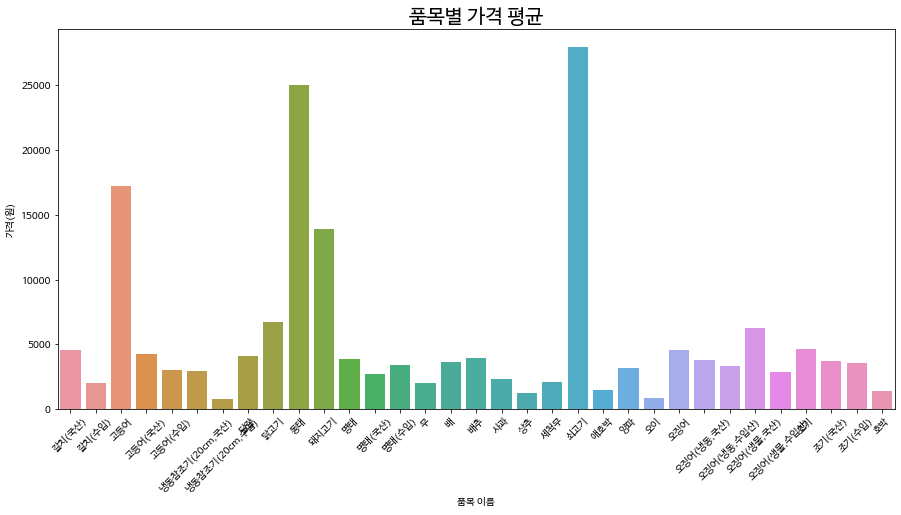

In [ ]:
# 품목별 가격 평균
cost = data.groupby('품목 이름').mean().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x = cost['품목 이름'], y = cost['가격(원)'])
plt.xticks(rotation=45)
plt.title('품목별 가격 평균',size=20)
plt.show()

In [ ]:
# 품목별 가격 변동
def product_cost(df,product_name):
  cost = df.copy()
  cost = cost[cost['품목 이름'] == product_name]
  cost = cost.groupby('년도-월').mean().reset_index()

  plt.figure(figsize=(15,7))
  sns.lineplot(x = '년도-월', y = '가격(원)', data=cost)
  plt.title(product_name,size=20)
  plt.show()

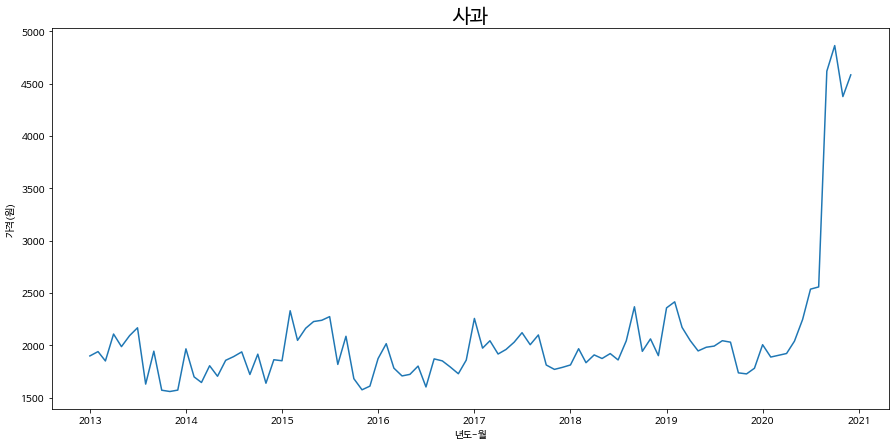

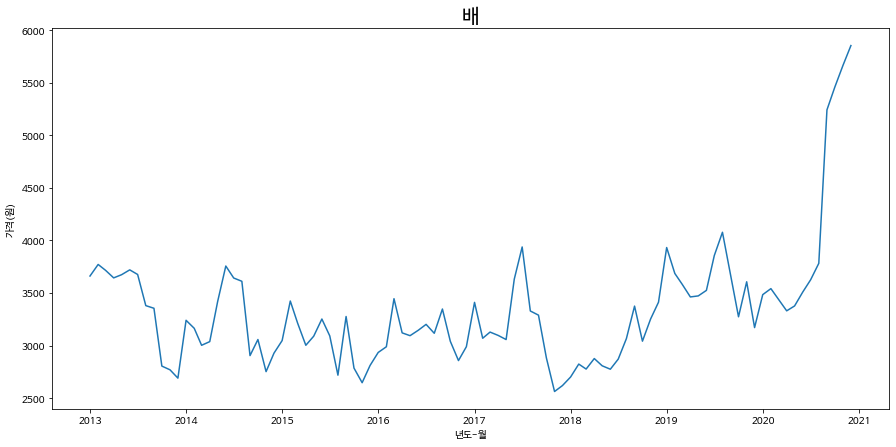

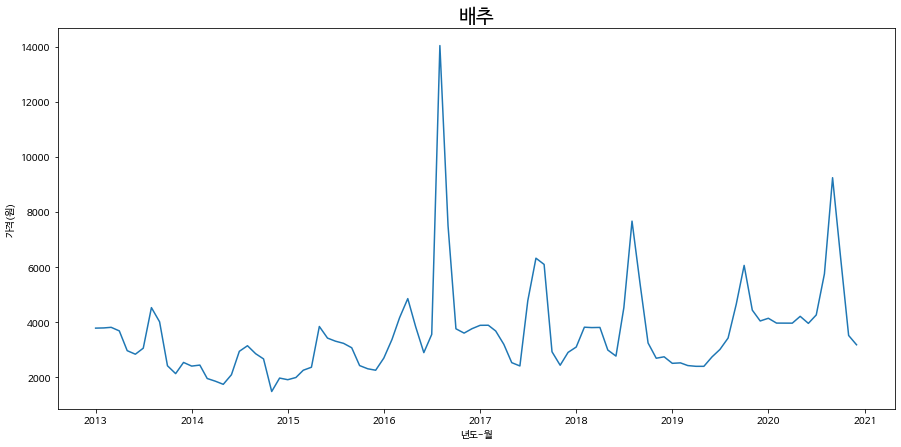

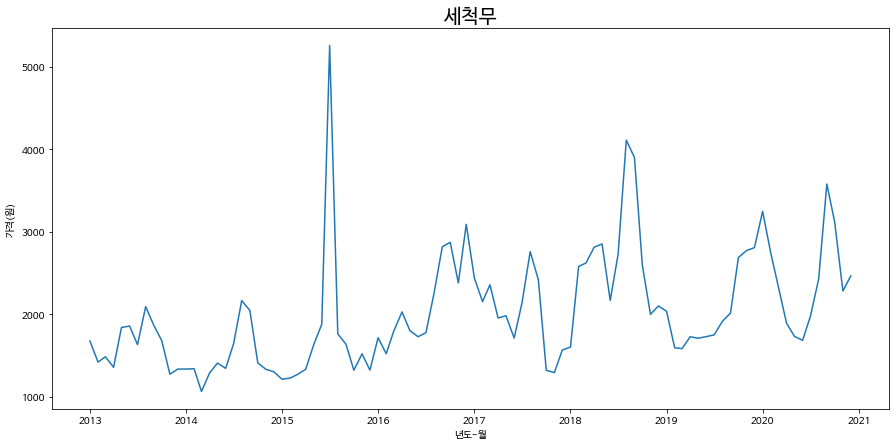

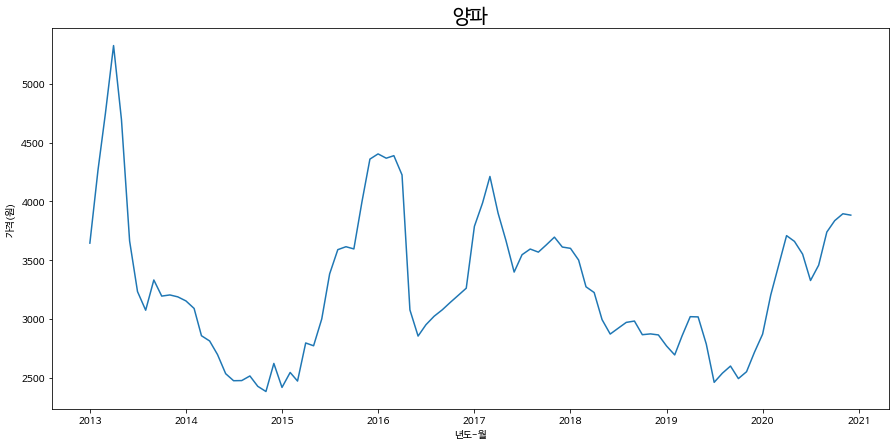

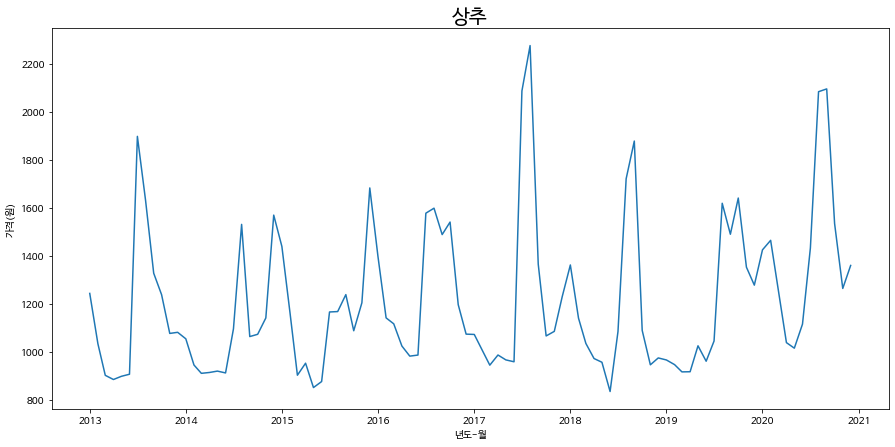

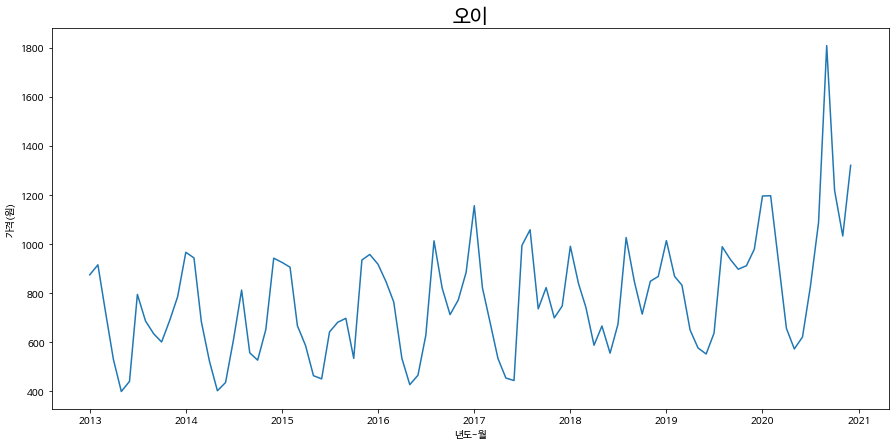

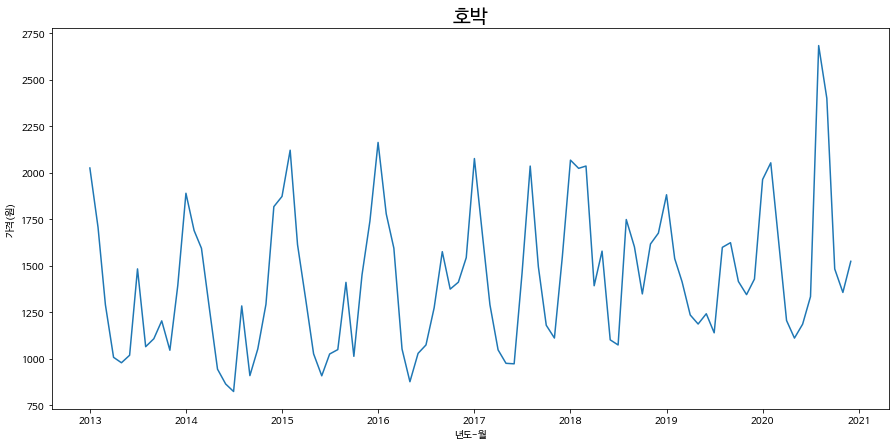

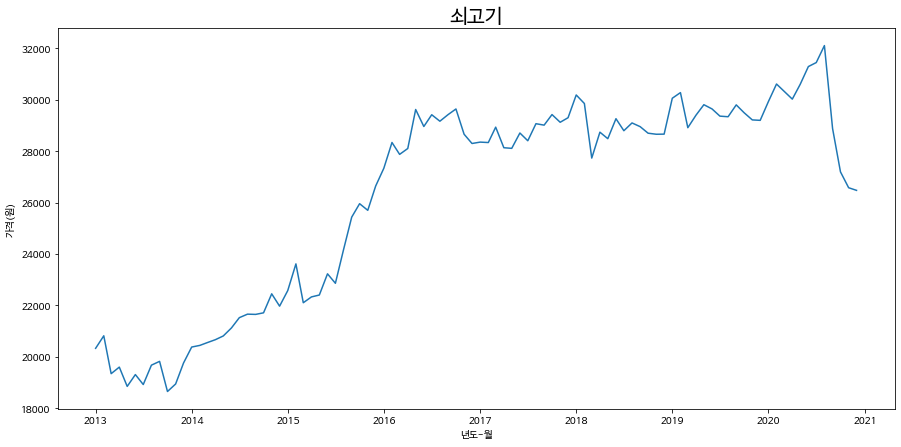

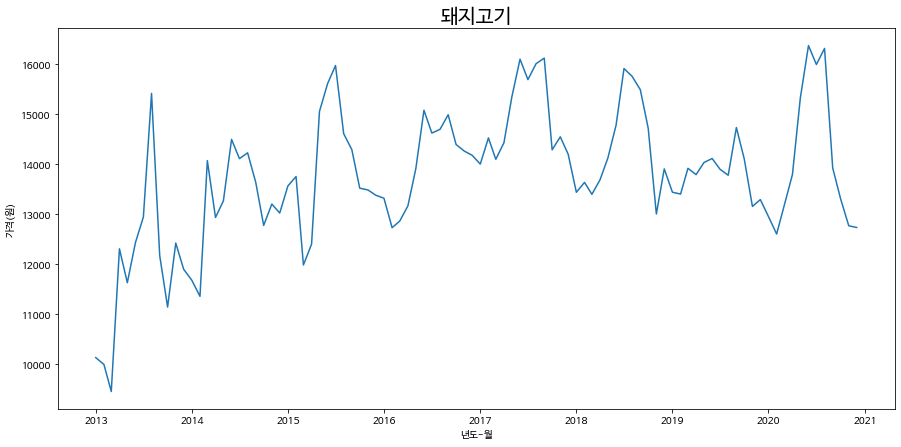

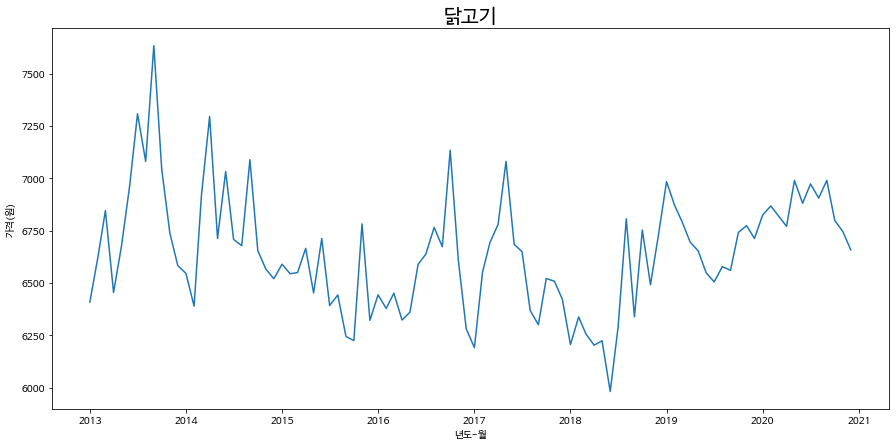

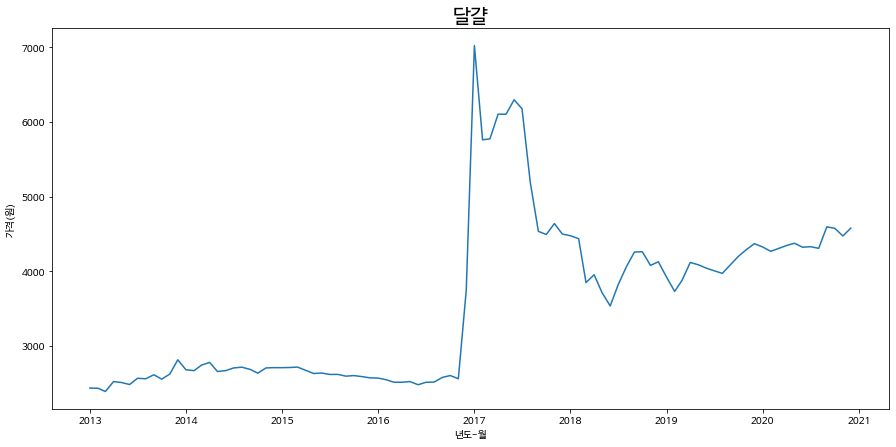

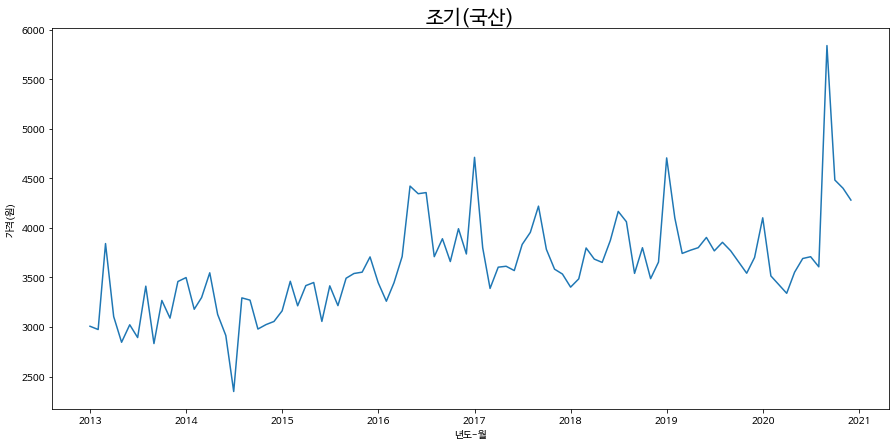

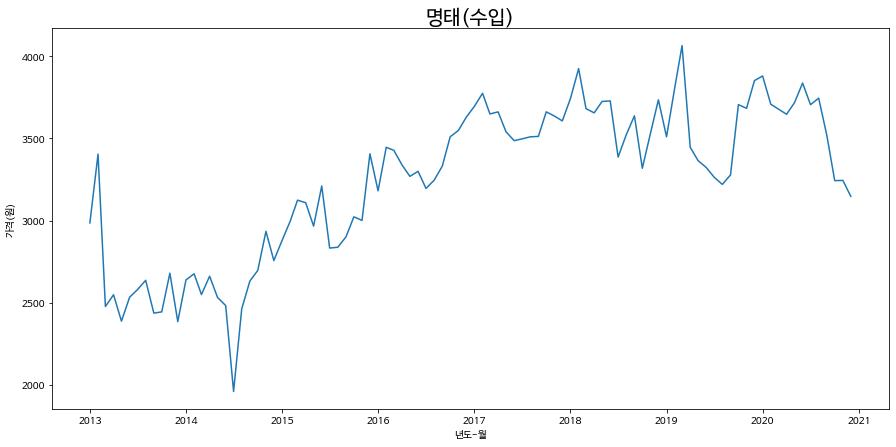

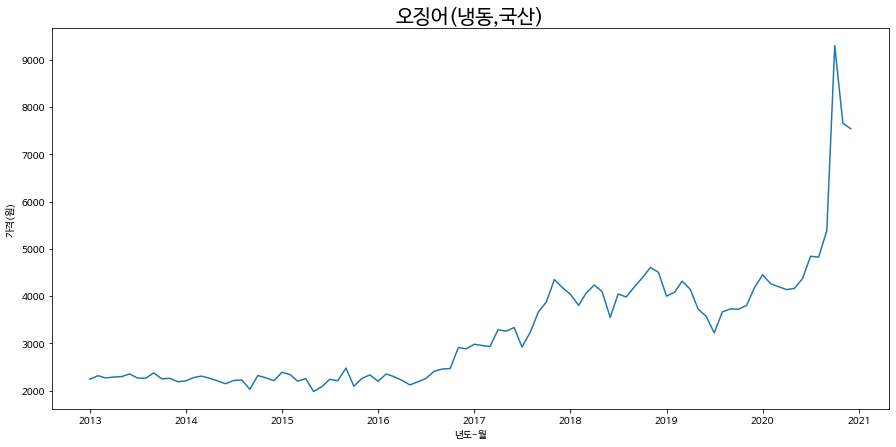

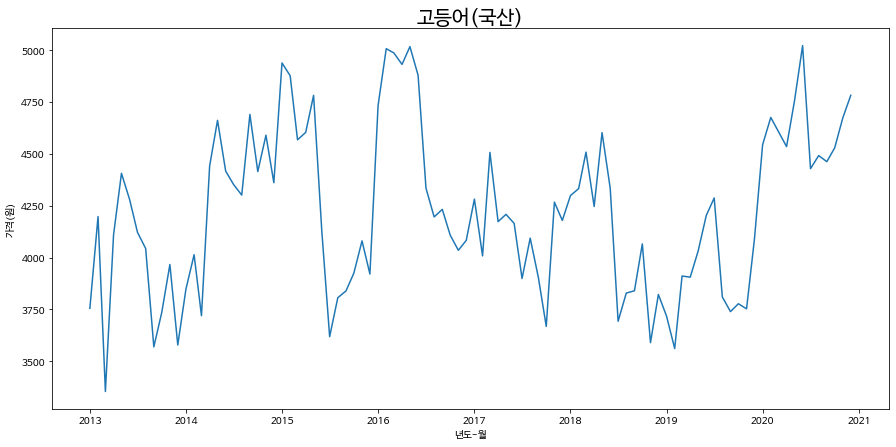

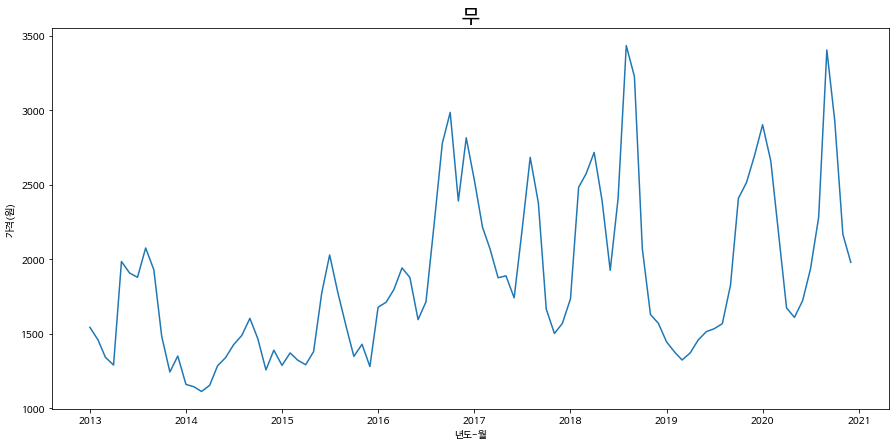

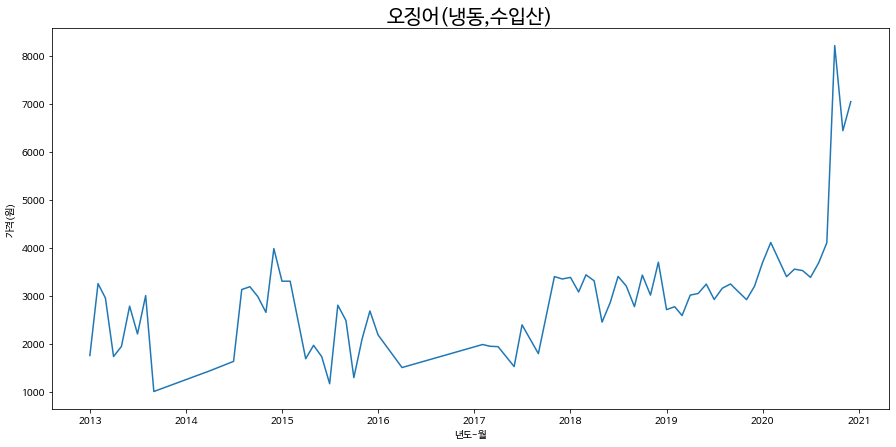

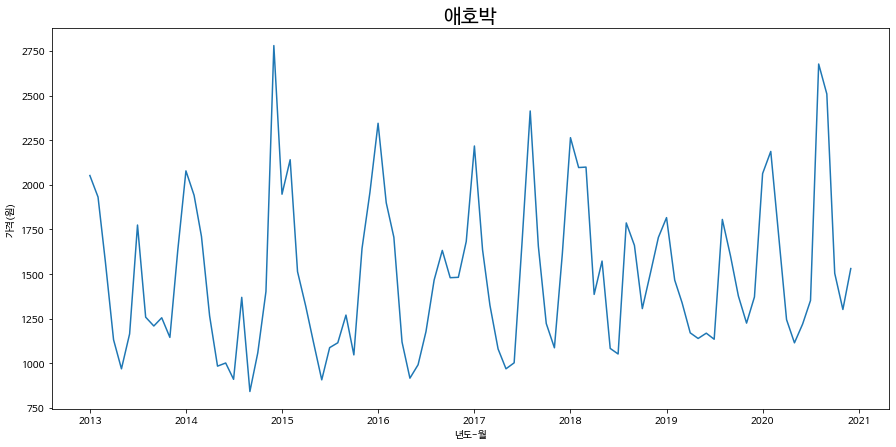

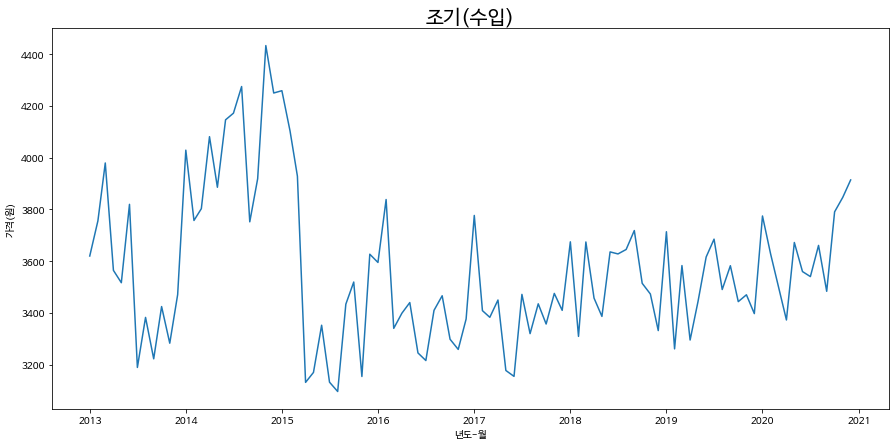

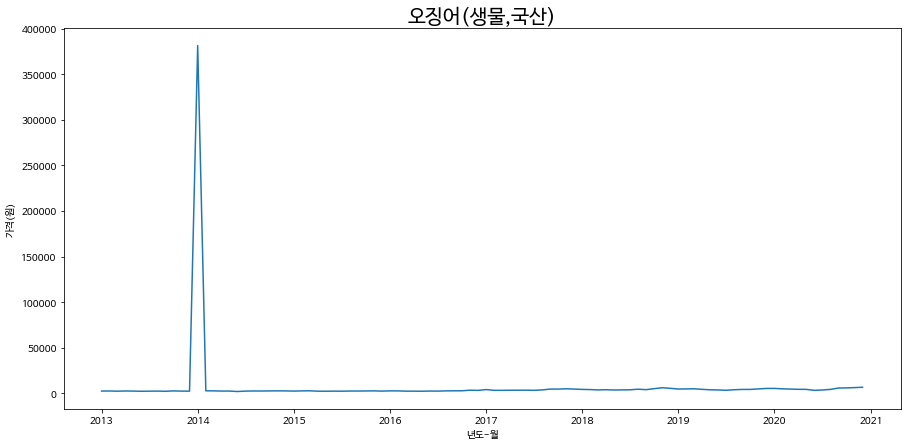

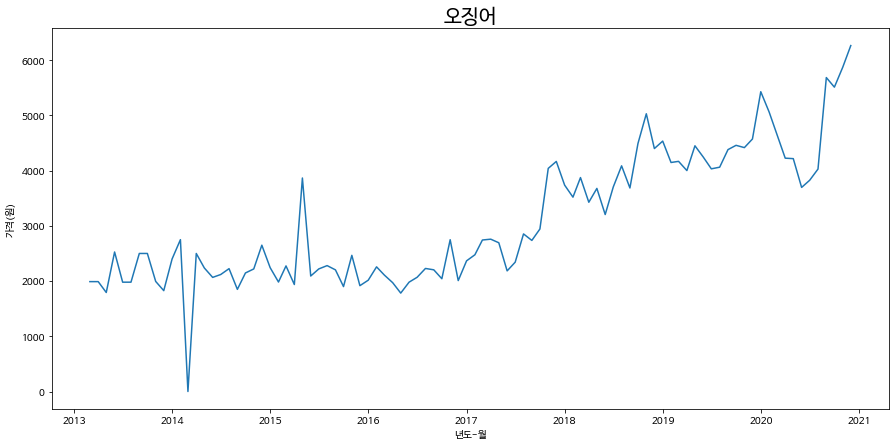

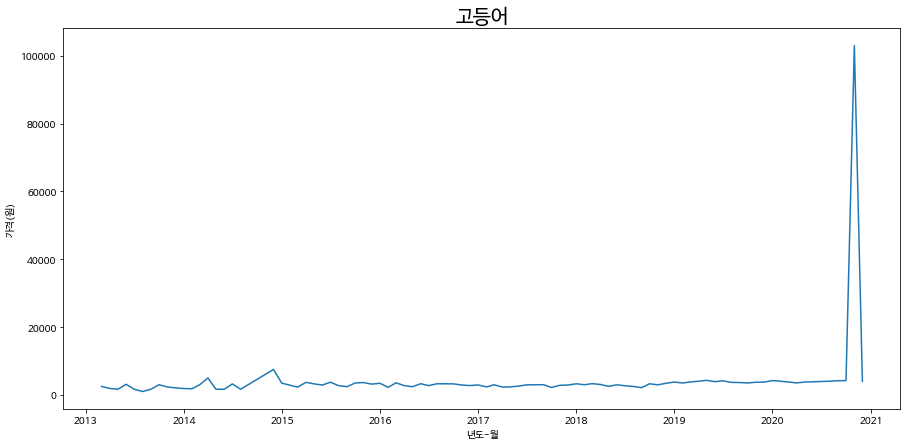

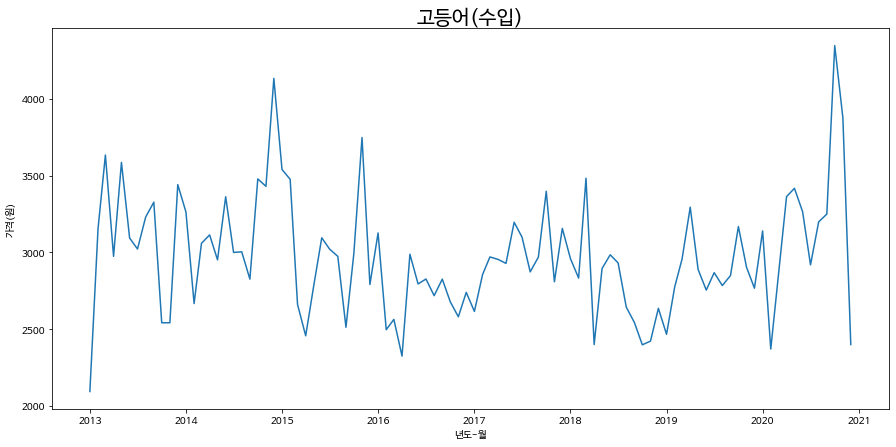

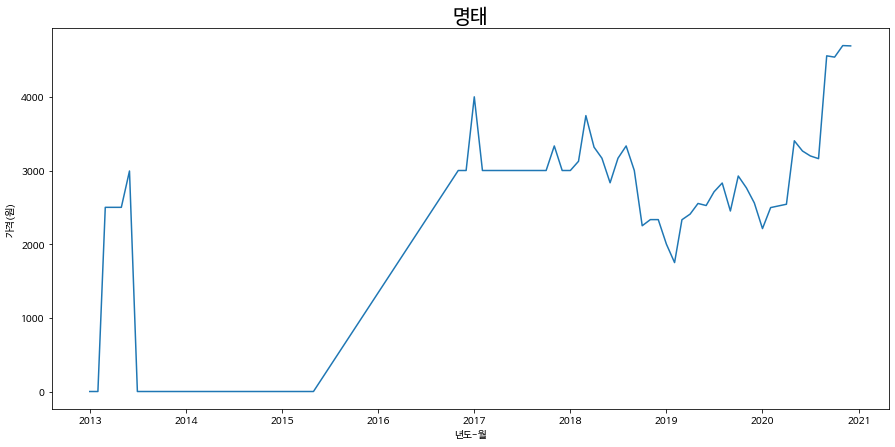

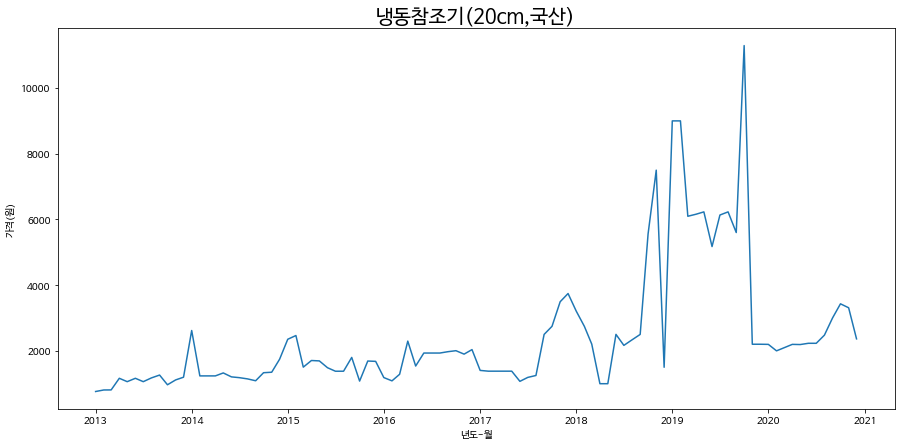

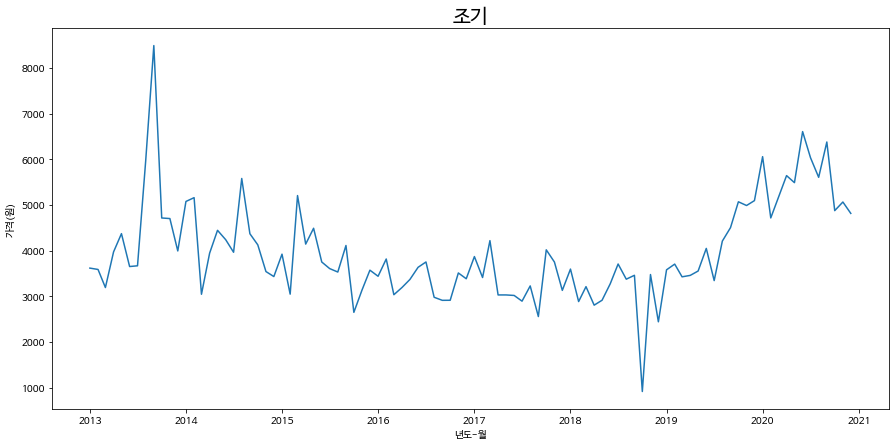

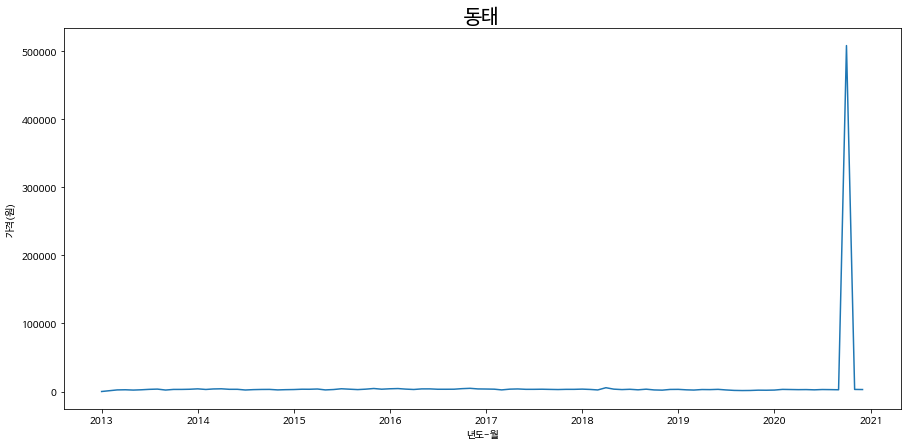

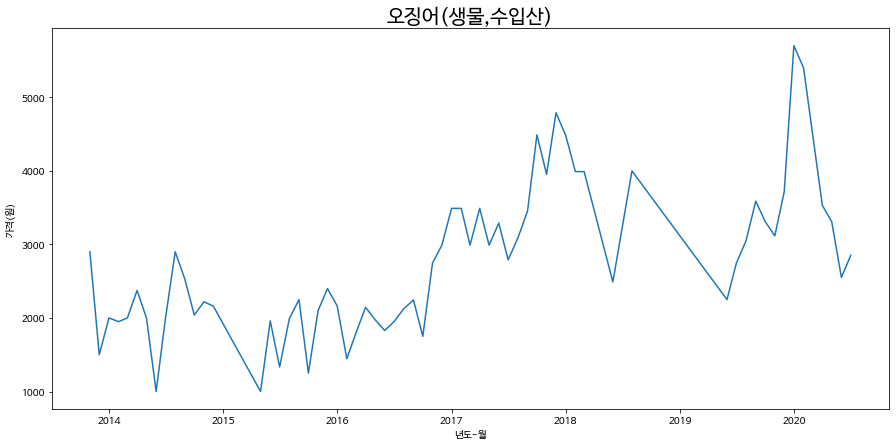

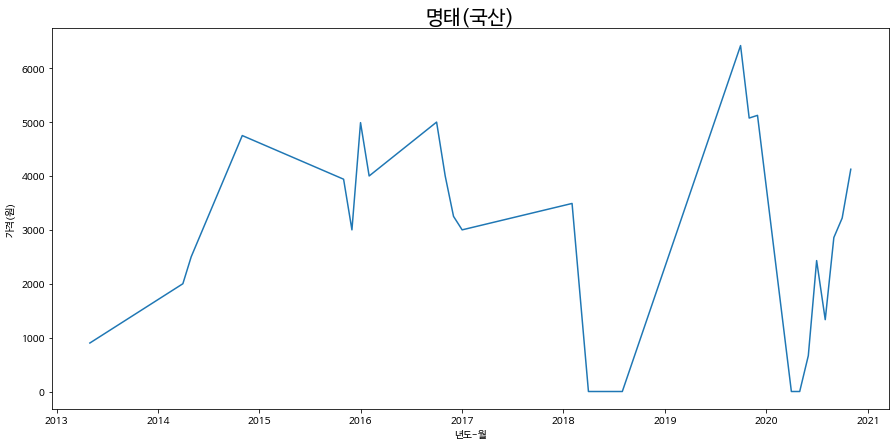

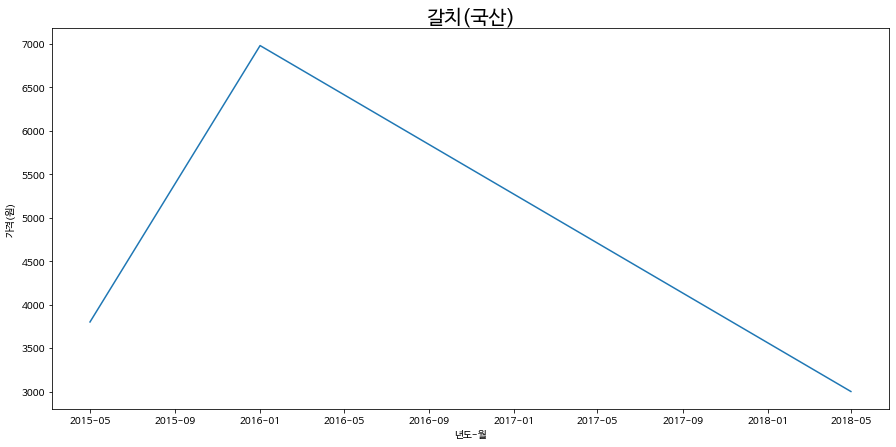

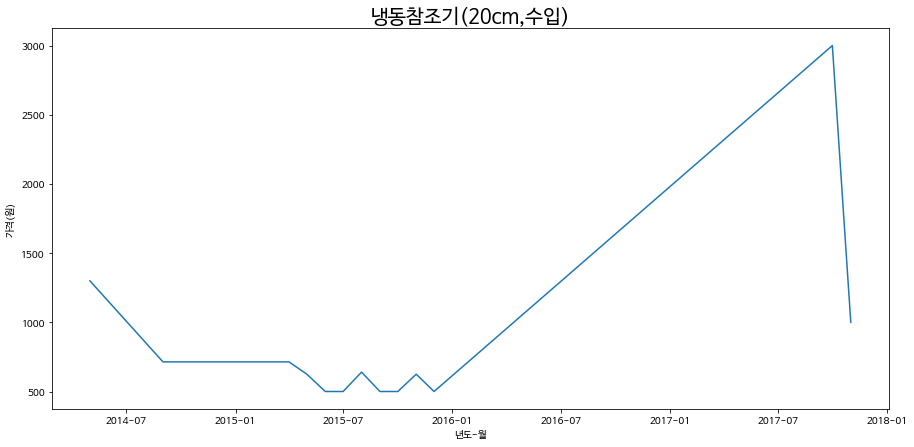

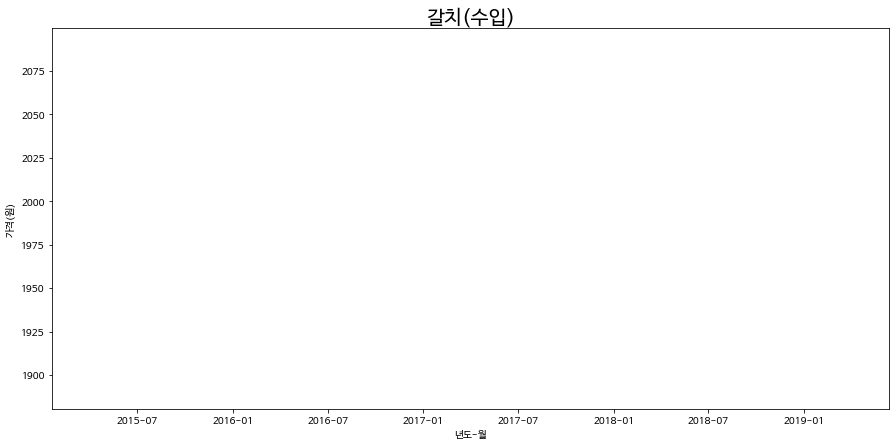

In [ ]:
for product in data['품목 이름'].unique():
  product_cost(data,product)


In [ ]:
# 품목별 가장 많이 판매된 자치구, 시장
def best_sales(df,product_name):
  cost = df.copy()
  cost = cost[cost['품목 이름'] == product_name]
  a = cost['자치구 이름'].value_counts().index[0]
  b = cost['시장/마트 이름'].value_counts().index[0]
  print(f'{product_name} : {a} {b}')

In [ ]:
data['']

In [ ]:
for product in data['품목 이름'].unique():
  best_sales(data,product)

사과 : 중구 방학동도깨비시장
배 : 중구 방학동도깨비시장
배추 : 중구 방학동도깨비시장
세척무 : 중구 남대문시장
양파 : 중구 방학동도깨비시장
상추 : 중구 방학동도깨비시장
오이 : 중구 방학동도깨비시장
호박 : 중구 화곡본동시장
쇠고기 : 중구 목3동시장
돼지고기 : 중구 목3동시장
닭고기 : 중구 방학동도깨비시장
달걀 : 중구 방학동도깨비시장
조기(국산) : 광진구 노룬산골목시장
명태(수입) : 중구 화곡본동시장
오징어(냉동,국산) : 광진구 뚝도시장
고등어(국산) : 관악구 인왕시장
무 : 관악구 방학동도깨비시장
오징어(냉동,수입산) : 중랑구 금남시장
애호박 : 영등포구 영천시장
조기(수입) : 중구 영천시장
오징어(생물,국산) : 성북구 장위골목시장
오징어 : 중구 서울중앙시장
고등어 : 중구 서울중앙시장
고등어(수입) : 금천구 홈플러스 시흥점
명태 : 송파구 방이시장
냉동참조기(20cm,국산) : 송파구 방이시장
조기 : 강남구 청담삼익시장
동태 : 강남구 청담삼익시장
오징어(생물,수입산) : 양천구 이마트 목동점
명태(국산) : 서대문구 현대백화점 신촌점
갈치(국산) : 강서구 송화시장
냉동참조기(20cm,수입) : 성동구 뚝도시장
갈치(수입) : 강서구 홈플러스등촌점
